## Task 1 : Ascending the Gradient Descent

#### Importing the libraries

In [98]:
import numpy as np
import torch
import matplotlib.pyplot as plt

#### Generating the dataset

In [99]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

#### Q1 Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of ($\theta_1,\theta_0$)

In [100]:
t0=torch.tensor(1.0, requires_grad=True)
t1=torch.tensor(2.0, requires_grad=True)

loss=0
for i in range(num_samples):
    yp= t0 + t1*x1[i]
    loss += (y[i]-yp)**2
loss=loss/num_samples
loss.backward()
print(f"Gradient with respect to t0: {t0.grad.item()}")
print(f"Gradient with respect to t1: {t1.grad.item()}")

Gradient with respect to t0: -5.785816192626953
Gradient with respect to t1: 0.06868766248226166


#### Q2 Using the same ($\theta_1,\theta_0$) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [101]:
l=0.0
t0_grad=[]
t1_grad=[]
for i in range(num_samples):
    yp= t0 + t1*x1[i]
    l= (y[i]-yp)**2
    t0.grad.zero_()
    t1.grad.zero_()  
    l.backward()
    t0_grad.append(t0.grad.item())
    t1_grad.append(t1.grad.item())

print(f"Gradient with respect to t0: {np.mean(t0_grad)}")
print(f"Gradient with respect to t1: {np.mean(t1_grad)}")

Gradient with respect to t0: -5.7858156859874725
Gradient with respect to t1: 0.06868768092244863


#### Q3 Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ (or ϵ-neighborhood) from the minimum value of the loss function.Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

##### Full batch gradient descent

Epoch: 100, Loss: 1.1006596088409424
Epoch: 200, Loss: 0.7074881792068481
Epoch: 300, Loss: 0.6279353499412537
Epoch: 400, Loss: 0.6051896810531616
Epoch: 500, Loss: 0.5985234975814819
Epoch: 600, Loss: 0.5965670347213745
Epoch: 700, Loss: 0.5959927439689636
Epoch: 800, Loss: 0.5958242416381836
Epoch: 900, Loss: 0.59577476978302
Epoch: 1000, Loss: 0.5957602262496948
Epoch: 1100, Loss: 0.595755934715271
Epoch: 1200, Loss: 0.5957547426223755
Epoch: 1300, Loss: 0.5957543849945068
Epoch: 1400, Loss: 0.5957542657852173
Epoch: 1500, Loss: 0.5957541465759277
Epoch: 1600, Loss: 0.5957542657852173
Epoch: 1700, Loss: 0.595754086971283
Epoch: 1800, Loss: 0.5957541465759277
Epoch: 1900, Loss: 0.5957542061805725
Epoch: 2000, Loss: 0.5957542061805725
Epoch: 2100, Loss: 0.5957542061805725
Epoch: 2200, Loss: 0.5957542061805725
Epoch: 2300, Loss: 0.5957542061805725
Epoch: 2400, Loss: 0.5957542061805725
Epoch: 2500, Loss: 0.5957542061805725

t0: 3.9506988525390625
t1: 2.682448148727417


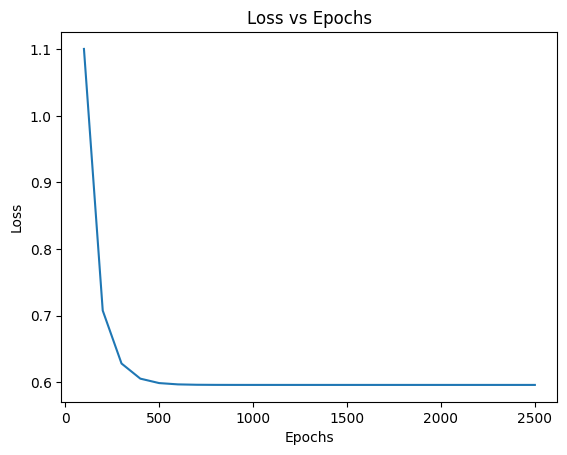

minimum loss: 0.5957542061805725
Convergance at epoch: 600, Loss: 0.5965670347213745


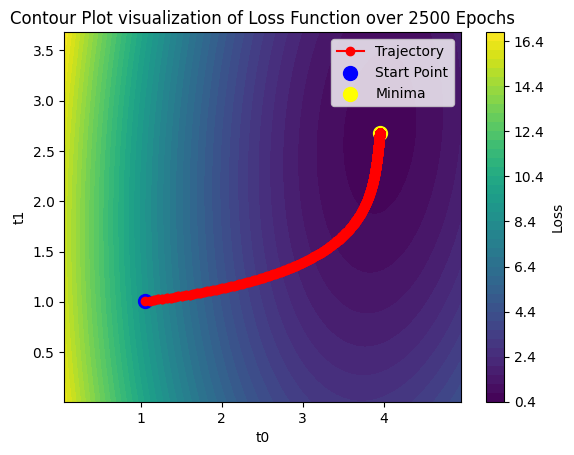

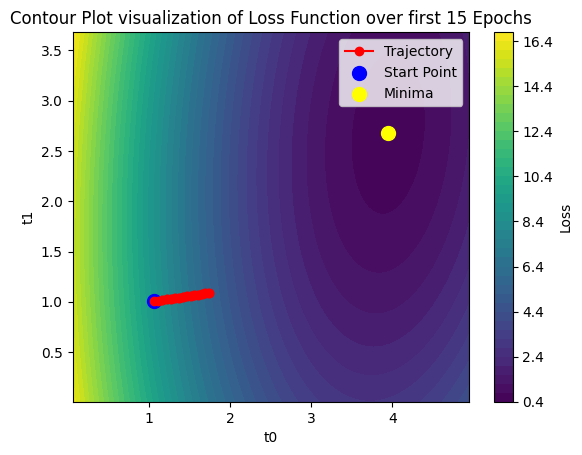

Loss after 15 Epochs: 5.890503883361816


In [105]:
t0=torch.tensor(1.0, requires_grad=True)
t1=torch.tensor(1.0, requires_grad=True)
alpha=0.01

t0_values = []
t1_values = []
loss_values = []

dict={}

for epoch in range(1,2501):
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    loss.backward()
    if(epoch%100==0):
        dict[epoch]=loss.item()
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
    with torch.no_grad():
        t0 -= alpha*t0.grad
        t1 -= alpha*t1.grad

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

    t0.grad.zero_()
    t1.grad.zero_()

print()
print(f"t0: {t0.item()}")
print(f"t1: {t1.item()}")

plt.plot(dict.keys(), dict.values())
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

print(f"minimum loss: {dict[2500]}")
epsheilon=0.001
for epoch in dict:
    if(dict[epoch]-dict[2500]<=epsheilon):
        print(f"Convergance at epoch: {epoch}, Loss: {dict[epoch]}")
        break

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 2500 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 2500 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(t0_values[-1], t1_values[-1], c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 2500 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(t0_values[-1], t1_values[-1], c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")

##### Mini-batch gradient descent

Epoch: 10, Loss: 2.2452855110168457
Epoch: 20, Loss: 1.0880531072616577
Epoch: 30, Loss: 0.810522198677063
Epoch: 40, Loss: 0.7053922414779663
Epoch: 50, Loss: 0.6542704701423645
Epoch: 60, Loss: 0.6273255944252014
Epoch: 70, Loss: 0.6128281354904175
Epoch: 80, Loss: 0.6049910187721252
Epoch: 90, Loss: 0.6007511019706726
Epoch: 100, Loss: 0.5984576940536499
Epoch: 110, Loss: 0.5972179174423218
Epoch: 120, Loss: 0.5965482592582703
Epoch: 130, Loss: 0.5961868166923523
Epoch: 140, Loss: 0.5959920287132263
Epoch: 150, Loss: 0.5958871841430664
Epoch: 160, Loss: 0.5958309173583984
Epoch: 170, Loss: 0.5958009362220764
Epoch: 180, Loss: 0.5957848429679871
Epoch: 190, Loss: 0.595776379108429
Epoch: 200, Loss: 0.5957720875740051
Epoch: 210, Loss: 0.5957695841789246
Epoch: 220, Loss: 0.595768392086029
Epoch: 230, Loss: 0.5957679748535156
Epoch: 240, Loss: 0.5957676768302917
Epoch: 250, Loss: 0.5957674980163574
Epoch: 260, Loss: 0.5957674384117126
Epoch: 270, Loss: 0.5957674384117126
Epoch: 280, L

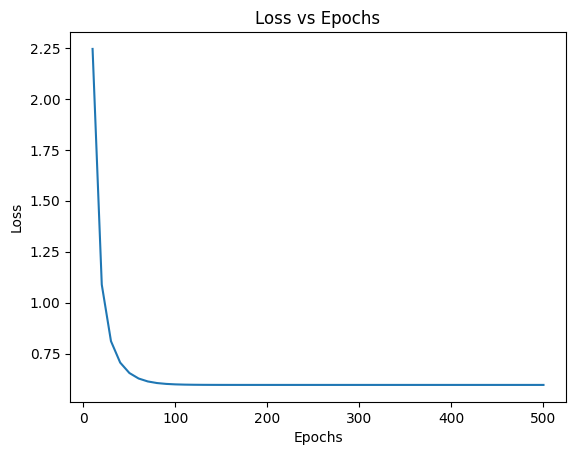

Convergance at epoch: 120, Loss: 0.5965482592582703


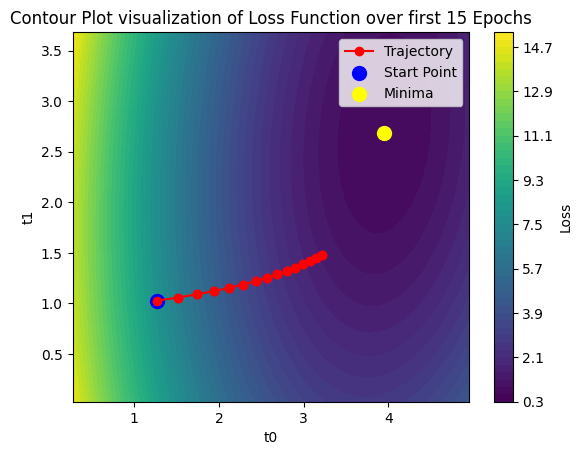

Loss after 15 Epochs: 1.4436627626419067


In [106]:
# Hyperparameters
batch_size = 8  # Modify as per requirement
alpha = 0.01

# Initialize parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

t0_values = []
t1_values = []
loss_values = []

dict_mb = {}

# Mini-batch gradient descent
for epoch in range(1,501):
    for it in range(0, num_samples, batch_size):
        loss = 0
        for i in range(it, min(it + batch_size, num_samples)):
            yp = t0 + t1 * x1[i]
            loss += (y[i] - yp) ** 2
        loss = loss / batch_size
        loss.backward()
        with torch.no_grad():
            t0 -= alpha * t0.grad
            t1 -= alpha * t1.grad
        t0.grad.zero_()
        t1.grad.zero_()
    # Calculate loss for the entire dataset after each epoch
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    if(epoch%10==0):
        dict_mb[epoch]=loss.item()
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

print()
print(f"t0: {t0.item()}")
print(f"t1: {t1.item()}")

# Plotting Loss vs Epochs for Mini-batch Gradient Descent
plt.plot(dict_mb.keys(), dict_mb.values(), label='Mini-batch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

epsheilon=0.001
for epoch in dict_mb:
    if(dict_mb[epoch]-dict[2500]<=epsheilon):
        print(f"Convergance at epoch: {epoch}, Loss: {dict_mb[epoch]}")
        break

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 2500 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(3.9506988525390625, 2.682448148727417, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")

##### Stochastic gradient descent

Epoch: 1, Loss: 2.7855753898620605
Epoch: 2, Loss: 1.3171966075897217
Epoch: 3, Loss: 0.9159649610519409
Epoch: 4, Loss: 0.7675114870071411
Epoch: 5, Loss: 0.6957295536994934
Epoch: 6, Loss: 0.6556494832038879
Epoch: 7, Loss: 0.6319900155067444
Epoch: 8, Loss: 0.6177812814712524
Epoch: 9, Loss: 0.6092203855514526
Epoch: 10, Loss: 0.604071855545044
Epoch: 11, Loss: 0.6009887456893921
Epoch: 12, Loss: 0.5991533994674683
Epoch: 13, Loss: 0.5980694890022278
Epoch: 14, Loss: 0.5974363088607788
Epoch: 15, Loss: 0.5970714092254639
Epoch: 16, Loss: 0.5968657732009888
Epoch: 17, Loss: 0.5967534780502319
Epoch: 18, Loss: 0.596695065498352
Epoch: 19, Loss: 0.5966673493385315
Epoch: 20, Loss: 0.5966565012931824
Epoch: 21, Loss: 0.5966547727584839
Epoch: 22, Loss: 0.596657395362854
Epoch: 23, Loss: 0.5966618061065674
Epoch: 24, Loss: 0.596666693687439
Epoch: 25, Loss: 0.5966715216636658
Epoch: 26, Loss: 0.5966757535934448
Epoch: 27, Loss: 0.5966796278953552
Epoch: 28, Loss: 0.5966825485229492
Epoch

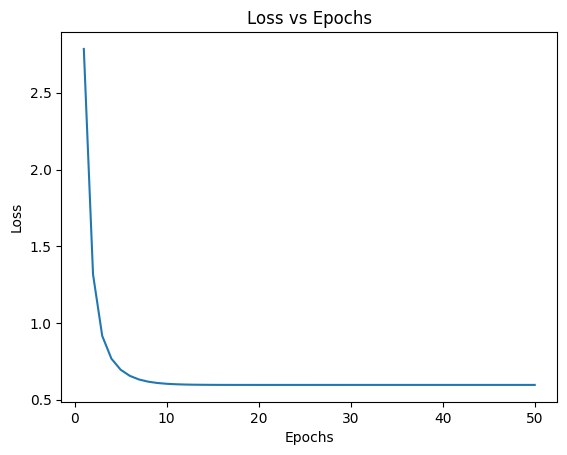

Convergance at epoch: 17, Loss: 0.5967534780502319


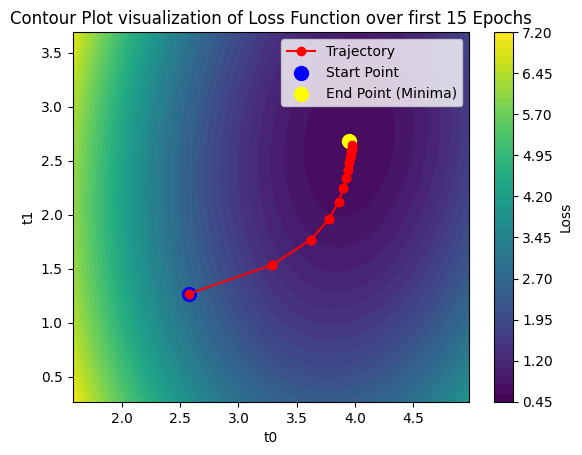

Loss after 15 Epochs: 0.5970714092254639


In [107]:
# Hyperparameters
alpha = 0.01

# Initialize parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

t0_values = []
t1_values = []
loss_values = []

dict_s = {}

# Mini-batch gradient descent
for epoch in range(1,51):
    for it in range(0, num_samples):
        loss = 0
        yp = t0 + t1 * x1[it]
        loss += (y[it] - yp) ** 2
        loss = loss
        loss.backward()
        with torch.no_grad():
            t0 -= alpha * t0.grad
            t1 -= alpha * t1.grad
        t0.grad.zero_()
        t1.grad.zero_()
    # Calculate loss for the entire dataset after each epoch
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    dict_s[epoch]=loss.item()
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

# Plotting Loss vs Epochs for Mini-batch Gradient Descent
plt.plot(dict_s.keys(), dict_s.values(), label='Mini-batch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

epsheilon=0.001
for epoch in dict_s:
    if(dict_s[epoch]-dict[2500]<=epsheilon):
        print(f"Convergance at epoch: {epoch}, Loss: {dict_s[epoch]}")
        break

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 2500 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(3.9506988525390625, 2.682448148727417, c='yellow', s=100, label='End Point (Minima)')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")